# Jan Izydorczyk
# Sprawozdanie 3

In [1]:
from numpy import float32,float64,log2
import sys
from matplotlib import pyplot as plt
import math
import numpy as np
import random
%matplotlib notebook

print("Wersja Pythona:")
print (sys.version)
print(f"Wersja numpy: {np.__version__}")
print("Konfiguracja liczb zmiennoprzecinkowych")
print(sys.float_info)

f64 = np.float64
f32 = np.float32

Wersja Pythona:
3.7.3 (v3.7.3:ef4ec6ed12, Mar 25 2019, 22:22:05) [MSC v.1916 64 bit (AMD64)]
Wersja numpy: 1.20.1
Konfiguracja liczb zmiennoprzecinkowych
sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


# Zadanie 1

In [39]:
def get_simpson(f, left, right):
    h = (right - left) / 2
    mid = left + h
    return 2 * h * (f(left) + 4 * f(mid) + f(right)) / 6

## 1 a)

In [40]:
def get_simpson_and_monomial_diff(degree):
    l, r = 0, 2
    simp_res = get_simpson(lambda x: x**degree, l, r)
    prop_res = (r**(degree + 1) - l**(degree + 1)) / (degree + 1)
    return abs(simp_res - prop_res) 

In [41]:
print(get_simpson_and_monomial_diff(1))

0.0


In [42]:
print(get_simpson_and_monomial_diff(2))

0.0


In [43]:
print(get_simpson_and_monomial_diff(3))

0.0


In [44]:
print(get_simpson_and_monomial_diff(4))

0.2666666666666666


In [45]:
print(get_simpson_and_monomial_diff(5))

1.333333333333334


## 1 b)

In [48]:
def expsin(x):
    return np.sin(4*x)*np.exp(-3 * x)

In [49]:
print(get_simpson(expsin, 0 , 5))

-0.0010027325181523321


In [50]:
print(get_simpson(expsin, 1 , 5) + get_simpson(expsin, 0 , 1))

0.10368557622593552


# TO DO
Wynika to z tego, że dla większej liczby przedziałów 

## 1 c)

In [52]:
from scipy import interpolate

In [57]:
xs = np.linspace(0, 5, 3)
ys = expsin(xs)
f_inter = interpolate.interp1d(xs, ys, kind='quadratic')

In [59]:
def plot_aprox_and_inter(f, f_inter, left, right):
    xs_range = np.linspace(left, right, 1000)
    ys_range = f(xs_range)
    plt.plot(xs_range, ys_range)
    ys_range = f_inter(xs_range)
    plt.plot(xs_range, ys_range)

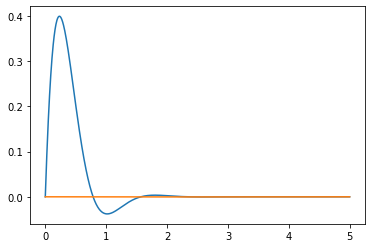

In [61]:
plot_aprox_and_inter(expsin, f_inter, 0, 5)

In [68]:
def plot_inters(f, fs_inter, nodes):
    left, right = nodes[0], nodes[-1]
    xs_range = np.linspace(left, right, 1000)
    ys_range = f(xs_range)
    plt.plot(xs_range, ys_range)
    for i, f_inter in enumerate(fs_inter):
        left, right = nodes[i], nodes[i + 1]
        xs_range = np.linspace(left, right, 1000)
        ys_range = f_inter(xs_range)
        plt.plot(xs_range, ys_range)

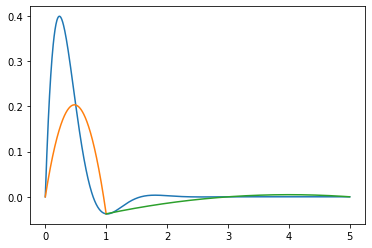

In [69]:
xs = np.linspace(0, 1, 3)
ys = expsin(xs)
f_1 = interpolate.interp1d(xs, ys, kind='quadratic')

xs = np.linspace(1, 5, 3)
ys = expsin(xs)
f_2 = interpolate.interp1d(xs, ys, kind='quadratic')
plot_inters(expsin, [f_1, f_2], [0, 1, 5])

Jest to wielomian z kotrego jest liczona analitycznie całka oznaczona w metodzie Simpsona, która ma przybliżać całkę oznaczoną zadanej funkcji.

# Zadanie 3

In [75]:
orto_polys = [np.poly1d([1]), np.poly1d([1, 0])]
def get_ortogonal(k):
    if len(orto_polys) < k:
        get_ortogonal(k-1)
    if len(orto_polys) == k:
        next_poly =  ((2 * k - 1) / k) * np.poly1d([1, 0]) * orto_polys[k-1] - (k-1)/k * orto_polys[k-2]
        orto_polys.append(next_poly)
    return orto_polys[k]

In [84]:
def plot_orto_pol(k, l=-1, r=1):
    poly = get_ortogonal(k)
    xs = np.linspace(l, r, 1000)
    ys = poly(xs)
    plt.plot(xs, ys)

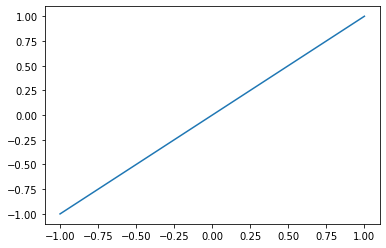

In [85]:
plot_orto_pol(1)

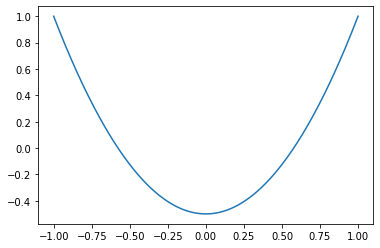

In [86]:
plot_orto_pol(2)

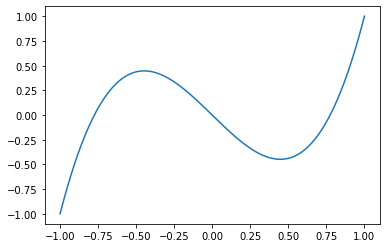

In [87]:
plot_orto_pol(3)

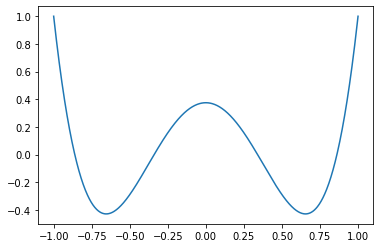

In [88]:
plot_orto_pol(4)

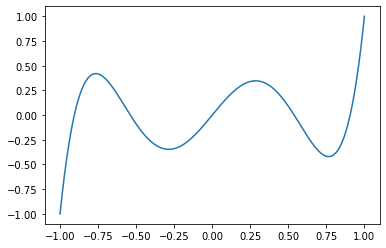

In [89]:
plot_orto_pol(5)